# preprocessing EMIT

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
pip install netcdf4 pysolar georadar

ERROR: Could not find a version that satisfies the requirement georadar (from versions: none)
ERROR: No matching distribution found for georadar


In [9]:
# additional libraries and exact versions:
!pip install git+https://github.com/spaceml-org/georeader.git


  Cloning https://github.com/spaceml-org/georeader.git to /tmp/pip-req-build-d61nducv
  Running command git clone --filter=blob:none --quiet https://github.com/spaceml-org/georeader.git /tmp/pip-req-build-d61nducv
  Resolved https://github.com/spaceml-org/georeader.git to commit 813d92ebbe79aa79b99c9a4bf05b7894cbc30bf3
  Preparing metadata (setup.py) ... done


## Download an EMIT image

In [17]:
import netCDF4 as nc

# Path to your NetCDF file
nc_file = '/content/drive/MyDrive/EMIT_L1B_RAD_001_20240401T201020_2409213_007.nc'

# Open the NetCDF file
ds = nc.Dataset(nc_file, mode='r')

rst=ds
# Print the variables in the file
print(ds)


# Close the dataset after you're done
ds.close()


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    ncei_template_version: NCEI_NetCDF_Swath_Template_v2.0
    summary: The Earth Surface Mineral Dust Source Investigation (EMIT) is an Earth Ventures-Instrument (EVI-4) Mission that maps the surface mineralogy of arid dust source regions via imaging spectroscopy in the visible and short-wave infrared (VSWIR). Installed on the International Space Station (ISS), the EMIT instrument is a Dyson imaging spectrometer that uses contiguous spectroscopic measurements from 410 to 2450 nm to resolve absoprtion features of iron oxides, clays, sulfates, carbonates, and other dust-forming minerals. During its one-year mission, EMIT will observe the sunlit Earth's dust source regions that occur within +/-52° latitude and produce maps of the source regions that can be used to improve forecasts of the role of mineral dust in the radiative forcing (warming or cooling) of the atmosphere.\n\nThis file contains L1B at-s

In [18]:
rst = emit.EMITImage('/content/drive/MyDrive/EMIT_L1B_RAD_001_20240401T201020_2409213_007.nc')
rst

 
         File: /content/drive/MyDrive/EMIT_L1B_RAD_001_20240401T201020_2409213_007.nc
         Transform: | 0.00,-0.00,-121.93|
|-0.00,-0.00, 38.66|
| 0.00, 0.00, 1.00|
         Shape: (285, 1884, 2470)
         Resolution: (0.0005422325202601996, 0.0005422325202530942)
         Bounds: (-121.93264526509, 37.6392888719983, -120.59333094005677, 38.6608549401613)
         CRS: EPSG:4326
         units: uW/cm^2/SR/nm
        

## Create and inspec emit object

EMIT objects let you open an EMIT nc file without loading the content of the file in memory. The object in the cell below has 285 spectral bands. For the API description of the EMIT class see [the emit module](https://github.com/spaceml-org/georeader/blob/main/georeader/readers/emit.py). Since the object follows the API of georeader, you can read from the rasters using the functions from the [read](https://github.com/spaceml-org/georeader/blob/main/georeader/read.py) module.

In [ ]:
# file_save = "emit_database/EMIT_L1B_RAD_001_20220827T060753_2223904_013.nc"
ei = emit.EMITImage(file_save)
ei

 
         File: emit_database/raw/EMIT_L1B_RAD_001_20220827T060753_2223904_013.nc
         Transform: | 0.00,-0.00, 61.16|
|-0.00,-0.00, 36.83|
| 0.00, 0.00, 1.00|
         Shape: (285, 2007, 2239)
         Resolution: (0.0005422325202530942, 0.0005422325202530942)
         Bounds: (61.1592142222353, 35.74201728362127, 62.3732728350893, 36.8302779517758)
         CRS: EPSG:4326
         units: uW/cm^2/SR/nm
        

In [19]:
rst.nc_ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    ncei_template_version: NCEI_NetCDF_Swath_Template_v2.0
    summary: The Earth Surface Mineral Dust Source Investigation (EMIT) is an Earth Ventures-Instrument (EVI-4) Mission that maps the surface mineralogy of arid dust source regions via imaging spectroscopy in the visible and short-wave infrared (VSWIR). Installed on the International Space Station (ISS), the EMIT instrument is a Dyson imaging spectrometer that uses contiguous spectroscopic measurements from 410 to 2450 nm to resolve absoprtion features of iron oxides, clays, sulfates, carbonates, and other dust-forming minerals. During its one-year mission, EMIT will observe the sunlit Earth's dust source regions that occur within +/-52° latitude and produce maps of the source regions that can be used to improve forecasts of the role of mineral dust in the radiative forcing (warming or cooling) of the atmosphere.\n\nThis file contains L1B at-s

In [20]:
rst.wavelengths

array([ 381.00558,  388.4092 ,  395.81583,  403.2254 ,  410.638  ,
        418.0536 ,  425.47214,  432.8927 ,  440.31726,  447.7428 ,
        455.17035,  462.59888,  470.0304 ,  477.46292,  484.89743,
        492.33292,  499.77142,  507.2099 ,  514.6504 ,  522.0909 ,
        529.5333 ,  536.9768 ,  544.42126,  551.8667 ,  559.3142 ,
        566.7616 ,  574.20905,  581.6585 ,  589.108  ,  596.55835,
        604.0098 ,  611.4622 ,  618.9146 ,  626.36804,  633.8215 ,
        641.2759 ,  648.7303 ,  656.1857 ,  663.6411 ,  671.09753,
        678.5539 ,  686.0103 ,  693.4677 ,  700.9251 ,  708.38354,
        715.84094,  723.2993 ,  730.7587 ,  738.2171 ,  745.6765 ,
        753.1359 ,  760.5963 ,  768.0557 ,  775.5161 ,  782.97754,
        790.4379 ,  797.89935,  805.36176,  812.8232 ,  820.2846 ,
        827.746  ,  835.2074 ,  842.66986,  850.1313 ,  857.5937 ,
        865.0551 ,  872.5176 ,  879.98004,  887.44147,  894.90393,
        902.3664 ,  909.82886,  917.2913 ,  924.7538 ,  932.21

In [22]:
rst.time_coverage_start, rst.time_coverage_end

(datetime.datetime(2024, 4, 1, 20, 10, 20, tzinfo=datetime.timezone.utc),
 datetime.datetime(2024, 4, 1, 20, 10, 32, tzinfo=datetime.timezone.utc))

In [24]:
!pip install folium mapclassify

In [25]:
import folium
import matplotlib.pyplot as plt
import mapclassify


In [26]:
import geopandas as gpd

gpd.GeoDataFrame(geometry=[rst.footprint()],
                 crs=rst.crs).explore()

## Load RGB

Select the RGB bands, we see that the raster has only 3 channels now (see Shape in the output of the cell below). The `ei` object has an attribute called `wavelengths` with the central wavelength of the hyperspectral band.

In [30]:
ei=rst

In [32]:
import numpy as np
wavelengths_read = np.array([640, 550, 460])

bands_read = np.argmin(np.abs(wavelengths_read[:, np.newaxis] - rst.wavelengths), axis=1).tolist()
ei_rgb = ei.read_from_bands(bands_read)
ei_rgb

 
         File: /content/drive/MyDrive/EMIT_L1B_RAD_001_20240401T201020_2409213_007.nc
         Transform: | 0.00,-0.00,-121.93|
|-0.00,-0.00, 38.66|
| 0.00, 0.00, 1.00|
         Shape: (3, 1884, 2470)
         Resolution: (0.0005422325202601996, 0.0005422325202530942)
         Bounds: (-121.93264526509, 37.6392888719983, -120.59333094005677, 38.6608549401613)
         CRS: EPSG:4326
         units: uW/cm^2/SR/nm
        

## Normalize radiance to reflectance

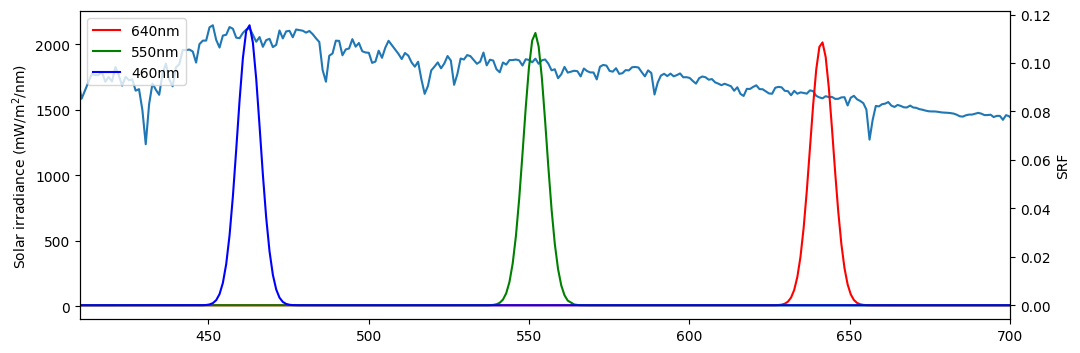

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from georeader import reflectance

thuiller = reflectance.load_thuillier_irradiance() # (dataframe with 8191 rows, 2 colums -> Nanometer, Radiance(mW/m2/nm)

ei_rgb.wavelengths, ei_rgb.fwhm # (K,) vectors with the center wavelength and the FWHM

response = reflectance.srf(ei_rgb.wavelengths, ei_rgb.fwhm, thuiller["Nanometer"].values) # (8191, K)

colors = ["red","green", "blue"]
fig, ax = plt.subplots(1,1,figsize=(12,4))

ax.plot(thuiller["Nanometer"].values,
        thuiller["Radiance(mW/m2/nm)"].values,
        label="Thuiller irradiance")
ax.set_ylabel("Solar irradiance (mW/m$^2$/nm)")
ax = ax.twinx()
for k in range(3):
    ax.plot(thuiller["Nanometer"].values, response[:, k],
            label=f"{wavelengths_read[k]}nm",c=colors[k])
ax.set_xlabel("Wavelength nm")
ax.set_ylabel("SRF")
ax.set_xlim(410,700)
ax.legend(loc="upper left")

In [34]:
ei_rgb.fwhm

array([8.46 , 8.443, 8.426], dtype=float32)

In [35]:
solar_irradiance_norm = thuiller["Radiance(mW/m2/nm)"].values.dot(response) # mW/m$^2$/nm
solar_irradiance_norm/=1_000  # W/m$^2$/nm
solar_irradiance_norm

array([1.60518365, 1.86268083, 2.06781357])

In [36]:
ei_rgb_local = ei_rgb.load()

In [37]:
ei_rgb_local = reflectance.radiance_to_reflectance(ei_rgb_local, solar_irradiance_norm,
                                                   ei.time_coverage_start)

<Axes: >

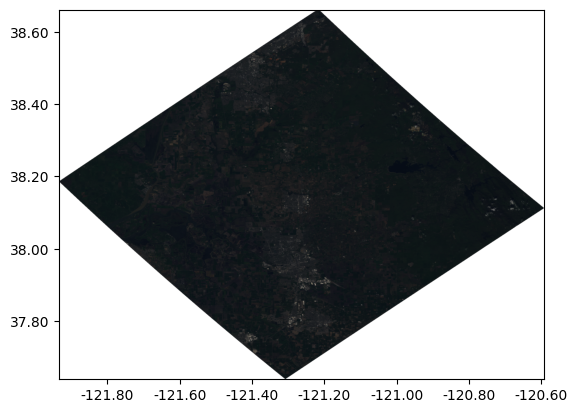

In [38]:
from georeader.plot import show

show((ei_rgb_local).clip(0,1),
     mask=ei_rgb_local.values == ei_rgb_local.fill_value_default)

## Reproject to UTM


In [40]:
import georeader

crs_utm = georeader.get_utm_epsg(ei.footprint("EPSG:4326"))
emit_image_utm = ei.to_crs(crs_utm)
emit_image_utm_rgb = emit_image_utm.read_from_bands(bands_read)
emit_image_utm_rgb_local = emit_image_utm_rgb.load()

emit_image_utm_rgb_local = reflectance.radiance_to_reflectance(emit_image_utm_rgb_local, solar_irradiance_norm,
                                                               ei.time_coverage_start)
emit_image_utm_rgb_local

 
         Transform: | 60.00, 0.00, 592864.90|
| 0.00,-60.00, 4281890.70|
| 0.00, 0.00, 1.00|
         Shape: (3, 1927, 1992)
         Resolution: (60.0, 60.0)
         Bounds: (592864.900125037, 4166270.702535987, 712384.900125037, 4281890.702535987)
         CRS: EPSG:32610
         fill_value_default: 0
        

In [42]:
!pip install matplotlib-scalebar

In [ ]:
import

<Axes: >

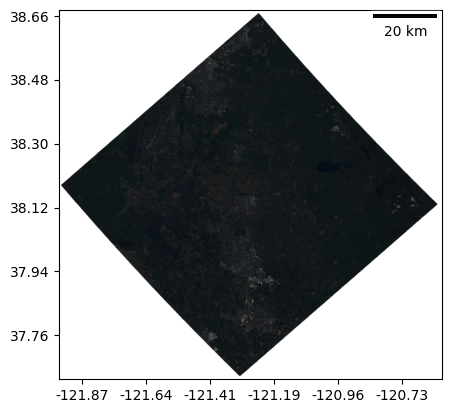

In [43]:
show((emit_image_utm_rgb_local).clip(0,1),
     mask=emit_image_utm_rgb_local.values == emit_image_utm_rgb_local.fill_value_default,
     add_scalebar=True)

<Axes: title={'center': 'Elevation'}>

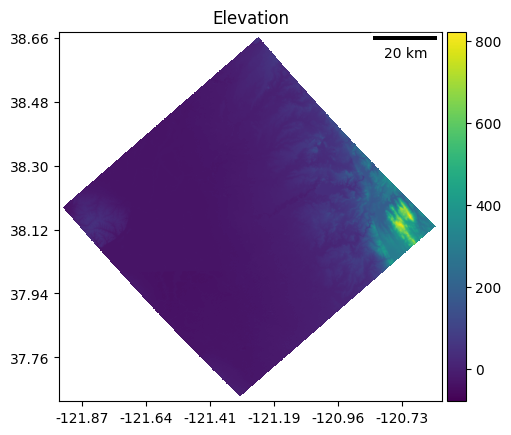

In [44]:
show(emit_image_utm.elevation(), add_colorbar_next_to=True, add_scalebar=True,
     mask=True,title="Elevation")

## Subset EMIT image

In [45]:
from georeader import read

point_tup = (61.28, 36.21)
ei_subset = read.read_from_center_coords(emit_image_utm_rgb, point_tup,
                                         shape=(200,200),crs_center_coords="EPSG:4326")
ei_subset_local = ei_subset.load()
ei_subset_local = reflectance.radiance_to_reflectance(ei_subset_local, solar_irradiance_norm,
                                                      ei.time_coverage_start)
ei_subset_local

 
         Transform: | 60.00, 0.00, 109144.90|
| 0.00,-60.00, 15986210.70|
| 0.00, 0.00, 1.00|
         Shape: (3, 200, 200)
         Resolution: (60.0, 60.0)
         Bounds: (109144.90012503695, 15974210.702535987, 121144.90012503695, 15986210.702535987)
         CRS: EPSG:32610
         fill_value_default: -9999.0
        

<Axes: >

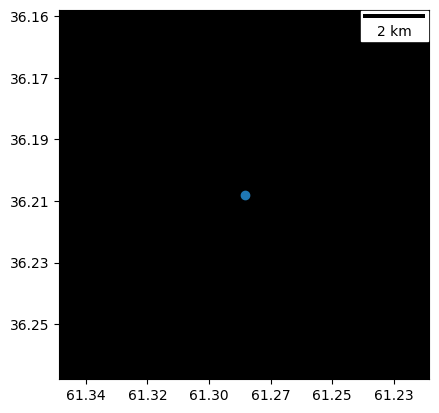

In [46]:
from georeader.plot import add_shape_to_plot
from shapely.geometry import Point

ax = show((ei_subset_local).clip(0,1),
          mask=ei_subset_local.values == ei_rgb_local.fill_value_default,
         add_scalebar=True)
add_shape_to_plot(Point(*point_tup),crs_shape="EPSG:4326",
                  crs_plot=ei_subset_local.crs, ax=ax)

## Load image non-orthorectified

### Full image

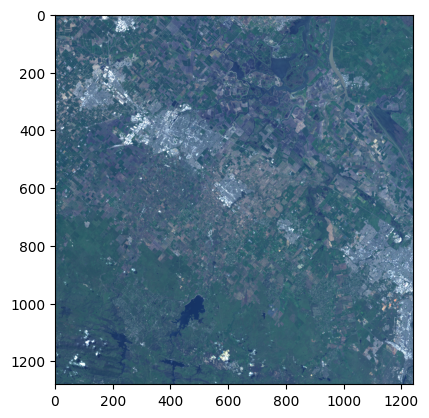

In [47]:
import matplotlib.pyplot as plt

ei_rgb_raw = ei_rgb.load_raw(transpose=False)
plt.imshow((ei_rgb_raw/12).clip(0,1))